In [2]:
import pandas as pd

df_csv=pd.read_csv('fct_invoice.csv')

In [3]:
#EASY 1

import pandas as pd

df_csv = pd.read_csv('fct_invoice.csv')

df_csv['customer_id'].nunique()

5191

In [4]:
#EASY 2
df_csv['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [5]:
#EASY 2
df_csv['category'].nunique()

8

In [6]:
#EASY 3

top=df_csv['payment_method'].value_counts()
top2=top.index[0]
top3=top.iloc[0]

print(top2)
print(top3)

Cash
44447


In [7]:
#MEDIUM 1

total=df_csv['price']*df_csv['quantity']

df_csv['sales']=total

rank=df_csv.groupby('category').sum()

rank2=rank['sales'].nlargest()

rank2[0:3]

/var/folders/2f/wgs7w77d7c3dsy50r7v01q680000gr/T/ipykernel_85965/2618827410.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rank=df_csv.groupby('category').sum()


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

In [8]:
#MEDIUM 2

df_json=pd.read_json('dim_customer.json')

merged=df_csv.merge(df_json,left_on="customer_id",right_on="id")

boogsh=merged[merged['age']>45]['sales']
boogsh.sum()

82039768.15

[11091 11395 11383 11513 11214 11378 11503 11456  5605  1180  1016   723]


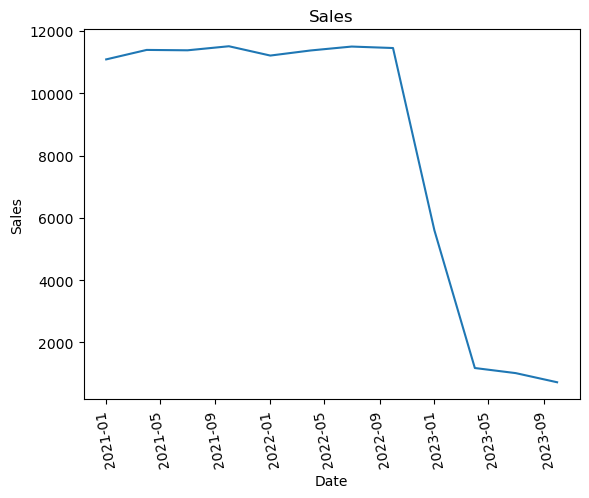

In [17]:
#MEDIUM 3

import matplotlib.pyplot as plt

merged['invoice_date'] = pd.to_datetime(merged['invoice_date'])

merged['date_group']=merged['invoice_date'].dt.to_period('Q')

Rev= merged.groupby('date_group').size()

Rev.index = Rev.index.to_timestamp()

plt.plot(Rev.index, Rev.values)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales')
plt.xticks(rotation=100)
plt.show()


In [257]:
#HARD 1
grouped_data = merged.groupby(['category', 'Season'])['sales'].sum().reset_index()
pivot_table = grouped_data.pivot_table(index='category', columns='Season', values='sales')

age_range=pd.cut(merged['age'],bins=range(0,101,10),right=False)
merged.pivot_table(index="category", columns=age_range,values="sales",aggfunc="sum")

age,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
category,,,,,,,,,,
Books,0.0,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,0.0
Clothing,0.0,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,0.0
Cosmetics,0.0,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,0.0
Food & Beverage,0.0,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,0.0
Shoes,0.0,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,0.0
Souvenir,0.0,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,0.0
Technology,0.0,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,0.0
Toys,0.0,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,0.0
